# 퍼셉트론(Perceptron)

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt

## 논리 게이트

In [4]:
def activation(x):
    return (x > 0).byte()

# AND 게이트 함수 정의
def AND(x, w, b):
    z = torch.dot(x, w) + b
    a = activation(z)
    return a

# NAND 게이트 함수 정의
def NAND(x, w, b):
    z = torch.dot(x, w) + b
    a = activation(z)
    return a

# AND 게이트 함수 정의
def OR(x, w, b):
    z = torch.dot(x, w) + b
    a = activation(z)
    return a

# 각 게이트에 알맞는 w, b 가중치 생성
w_and = torch.FloatTensor([0.5, 0.5])  
b_and = torch.FloatTensor([-0.7])
w_nand = torch.FloatTensor([-0.5, -0.5])  
b_nand = torch.FloatTensor([0.7])
w_or = torch.FloatTensor([0.5, 0.5]) 
b_or = torch.FloatTensor([-0.2])

# 입력 텐서를 만들어 결과 확인
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])
for x in X:
    print(f"input : {x.long().tolist()}")
    print(" - AND:", AND(x, w=w_and, b=b_and).item())
    print(" - NAND:", NAND(x, w=w_nand, b=b_nand).item())
    print(" - OR:", OR(x, w=w_or, b=b_or).item())
    print("--"*15)

input : [0, 0]
 - AND: 0
 - NAND: 1
 - OR: 0
------------------------------
input : [0, 1]
 - AND: 0
 - NAND: 1
 - OR: 1
------------------------------
input : [1, 0]
 - AND: 0
 - NAND: 1
 - OR: 1
------------------------------
input : [1, 1]
 - AND: 1
 - NAND: 0
 - OR: 1
------------------------------


### 다른 관점에서 퍼셉트론 이해하기
직관적인 그림으로 지금까지 소개한 AND, NAND, OR 게이트들을 이해해보자. 사실 이 모든 게이트들은 평면상에서 하나의 선으로 2종류의 점들을 분류하는 것과 같은 문제다. 

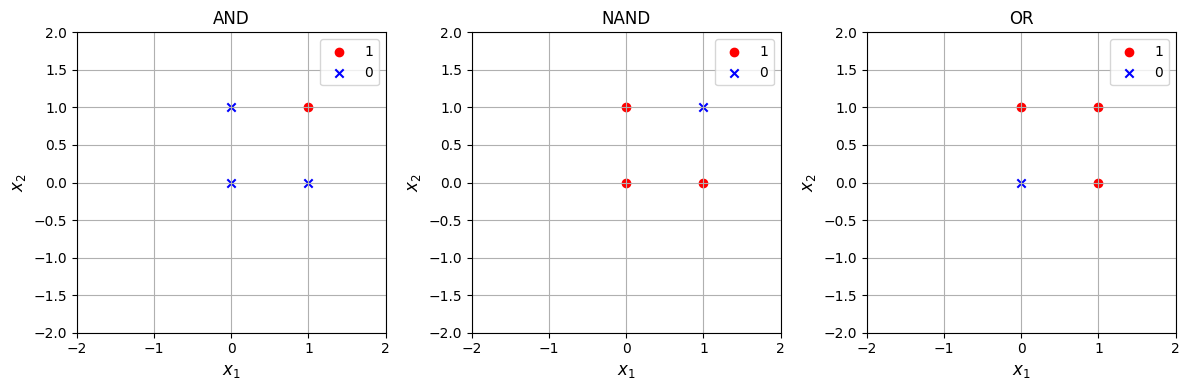

In [5]:
def plot_dots(ax, gate_func):
    x = [(0, 0), (1, 0), (0, 1), (1, 1)]
    if (gate_func.__name__ == "AND"):
        marker_o = list(zip(*x[3:]))
        marker_x = list(zip(*x[:3])) #어떤 모양으로 찍힐 것인지..
    elif (gate_func.__name__ == "NAND"):
        marker_o = list(zip(*x[:3]))
        marker_x = list(zip(*x[3:]))
    elif (gate_func.__name__ == "OR"):
        marker_o = list(zip(*x[1:]))
        marker_x = list(zip(*x[:1]))
    elif (gate_func.__name__ == "XOR"):
        marker_o = list(zip(*x[1:3]))
        marker_x = list(zip(*x[::3]))
    else:
        return "gate_func error"
    # 2차원에 plot
    ax.scatter(marker_o[0], marker_o[1], c='r', marker='o', label='1')
    ax.scatter(marker_x[0], marker_x[1], c='b', marker='x', label='0') # 점을 찍는다.
    ax.legend()
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_title(gate_func.__name__)
    ax.grid()
    ax.set_xlabel("$x_1$", fontsize=12)
    ax.set_ylabel("$x_2$", fontsize=12)
    
fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=100)

for ax, func in zip(axes, [AND, NAND, OR]):
    plot_dots(ax=ax, gate_func=func)
plt.tight_layout()
plt.show()

$z=w_1x_1+ w_2x_2 + b$ 에서 $z=0$ 으로 두고 $x_1, x_2$ 평면에 그려본다. 하나의 직선이 두 종류의 점을 분류하게 된다. 선형 분류기라고 불리는 이유도 이같은 이유다.

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


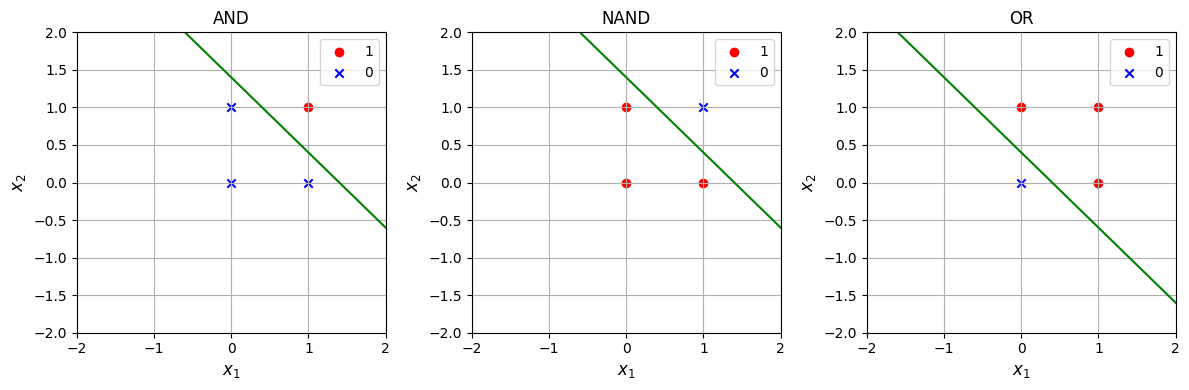

In [6]:
def plot_line(**kwargs): # keyword argument로 넘겨주겠다. **kwargs > arg=1, arg=2
    """x2 = (-w1*x1 - b) / w2"""
    x1 = [-2, 2]
    #dict 개념? 
    w = kwargs['w'] # w의 value
    b = kwargs['b'] # b라는 key값을 b로 넣기
    # x2 = -(w1/w2)*w1 - (b/w2)
    get_x2 = lambda x: (-w[0]*x - b) / w[1]
    # line plot
    ax=kwargs['ax']
    ax.plot(x1, [get_x2(x1[0]), get_x2(x1[1])], c='g')

fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=100)
for ax, func, (w, b) in zip(axes, [AND, NAND, OR], [(w_and, b_and), (w_nand, b_nand), (w_or, b_or)]):
    plot_dots(ax=ax, gate_func=func)
    plot_line(ax=ax, w=w, b=b)
plt.tight_layout()
plt.show()

## XOR 문제 (Coding Part)

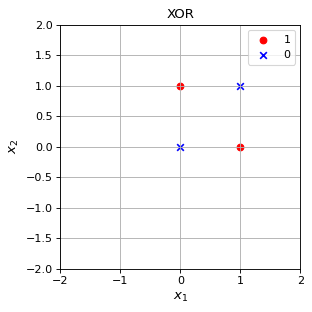

In [11]:
# 그림 2-30

def XOR(x, w, b):
    """empty function"""
    z = torch.dot(x, w) + b
    a = activation(z)
    pass

fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=80)
plot_dots(ax=ax, gate_func=XOR)
plt.tight_layout()
plt.show()

In [12]:
def solution(x, **kwargs):
    # 새로운 층
    s1 = NAND(x, w=kwargs['w_nand'], b=kwargs['b_nand'])
    s2 = OR(x, w=kwargs['w_or'], b=kwargs['b_or'])
    
    
    # 출력 층: s1 과 s2 를 새로운 입력으로 구성하여 전달
    y = AND(torch.Tensor([s1,s2]), w= kwargs['w_and'], b=kwargs['b_and'])
    return y

# 입력 텐서와 타겟 텐서를 생성
input_data = torch.FloatTensor([[0, 0], [1, 0], [0, 1], [1, 1]])
target_data = torch.FloatTensor([0, 1, 1, 0])

# 이전에 사용한 가중치를 dictionary 타입으로 만든다.
kwargs = dict([('w_nand', w_nand), ('b_nand', b_nand), 
               ('w_or', w_or), ('b_or', b_or), 
               ('w_and', w_and), ('b_and', b_and)])

# 테스트
for x, y in zip(input_data, target_data):
    pred = solution(x, **kwargs)
    print(f"predict: {pred.item()} | target: {y.byte().item()}")

predict: 0 | target: 0
predict: 1 | target: 1
predict: 1 | target: 1
predict: 0 | target: 0


/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


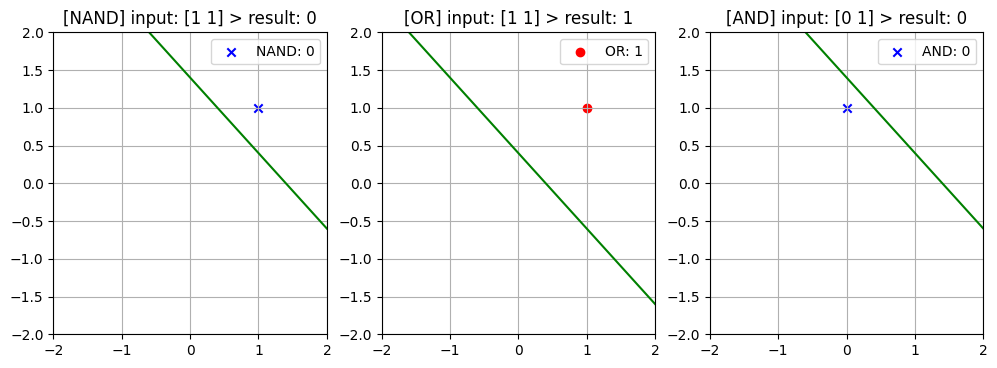

In [13]:
def draw_solution(x, w, b, ax, func):
    s = func(x, w=w, b=b).item()
    marker_shape = 'o' if s == 1 else 'x'
    marker_color = 'r' if s == 1 else 'b'
    ax.scatter(x.numpy()[0], x.numpy()[1], c=marker_color, marker=marker_shape, label='{}: {}'.format(func.__name__, s))
    plot_line(ax=ax, w=w, b=b)
    ax.legend()
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.grid()
    ax.set_title('[{}] input: {} > result: {}'.format(func.__name__, x.long().numpy(), s))
    
def draw_solution_by_step(x, **kwargs):
    NAND = kwargs['f_nand']
    OR = kwargs['f_or']
    AND = kwargs['f_and']
    fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=100)
    s = torch.FloatTensor([NAND(x, w=kwargs['w_nand'], b=kwargs['b_nand']), 
                           OR(x, w=kwargs['w_or'], b=kwargs['b_or'])])
    draw_solution(x, w=kwargs['w_nand'], b=kwargs['b_nand'], ax=axes[0], func=NAND)
    draw_solution(x, w=kwargs['w_or'], b=kwargs['b_or'], ax=axes[1], func=OR)
    draw_solution(s, w=kwargs['w_and'], b=kwargs['b_and'], ax=axes[2], func=AND)

x = torch.FloatTensor([1, 1])
kwargs.setdefault('f_nand', NAND)
kwargs.setdefault('f_or', OR)
kwargs.setdefault('f_and', AND)
draw_solution_by_step(x, **kwargs)

NAND와 OR의 결과 값으로 출력된 신호들로 구성된 점이 평면상에서 다른 곳으로 이동하면서 AND 함수를 거쳐 최종 출력 신호를 만들어 냈다. 이렇게 입력과 출력 사이에 층을 더하니 다른 표현을 만들어냈고, 추가로 새로운 정보가 구성되면서 원하는 출력 신호를 얻을 수 있게 된다. 

In [16]:
def draw_gate_area():
    fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=100)
    get_x2 = lambda x, w, b: (-w[0]*x - b) / w[1]
    w_nand, b_nand = [-0.5, -0.5], 0.7
    w_or, b_or = [0.5, 0.5], -0.2
    xx = torch.linspace(-2, 2, steps=5)
    y_nand = get_x2(xx, w=w_nand, b=b_nand)
    y_or = get_x2(xx, w=w_or, b=b_or)
    ax.fill_between(xx.numpy(), y_nand.numpy(), y_or.numpy(), facecolor='g', alpha=0.3)
    plot_dots(ax=ax, gate_func=XOR)
    plot_line(ax=ax,  w=w_nand, b=b_nand)
    plot_line(ax=ax,  w=w_or, b=b_or)
    plt.tight_layout()
    plt.show()

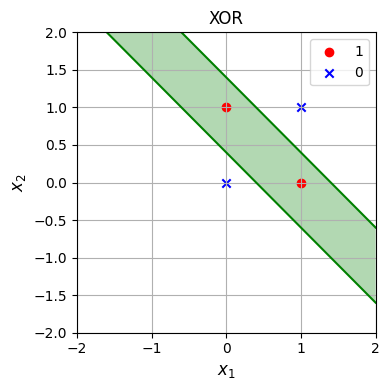

In [17]:
draw_gate_area()